# Statistique

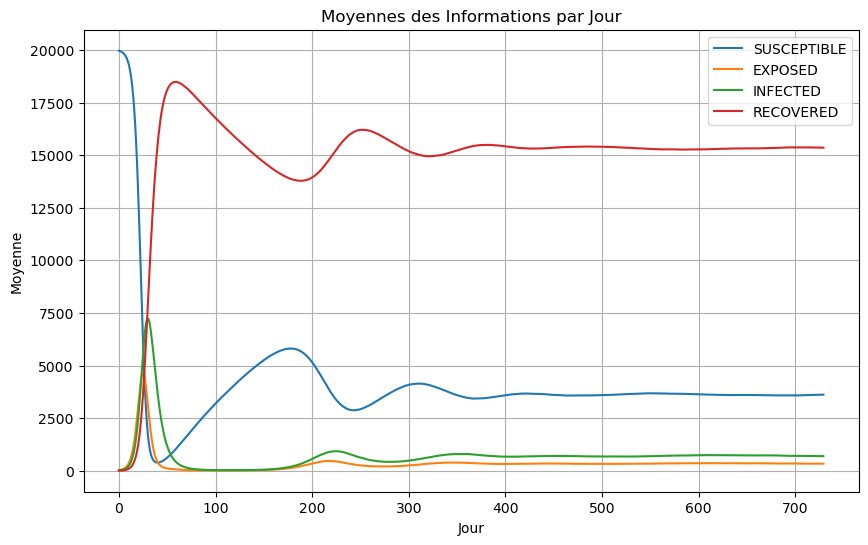

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Obtenez la liste des fichiers CSV dans un répertoire donné
files = glob.glob("./fileStat/*.csv")

# Créez un DataFrame vide pour stocker les moyennes des informations
column_means = pd.DataFrame(columns=['SUSCEPTIBLE', 'EXPOSED', 'INFECTED', 'RECOVERED'])

# Chargez les données de chaque fichier CSV et ajoutez-les aux moyennes
for file in files:
    df = pd.read_csv(file)
    column_means = column_means.add(df, fill_value=0)

# Calculez les moyennes en divisant par le nombre de fichiers
column_means = column_means / len(files)

# Créez un graphique des moyennes
plt.figure(figsize=(10, 6))
for column in column_means.columns:
    plt.plot(column_means.index, column_means[column], label=column)

plt.xlabel('Jour')
plt.ylabel('Moyenne')
plt.title('Moyennes des Informations par Jour')
plt.legend()
plt.grid(True)

# Affichez le graphique
plt.show()

Pour procéder à une telle simulation, nous avons utilisées les classes suivantes:

# Individu
## attributs

- private Statut statut;    -> Le statut de l'individu
- private int time;         -> Le temps de jour de l'individu dans le statu en question
- private int dE;           -> La durée de l'exposition
- private int dI;           -> La durée d'infection
- private int dR;           -> La durée necessaire avant d'être guérie
- private int x;            -> position x dans la grille
- private int y;            -> position y dans la grille

## méthodes

L'ensemble des méthodes d'individu sont des getter & setter des attributs ci-dessus

# Statut

- SUSCEPTIBLE,
- EXPOSED,
- INFECTED,
- RECOVERED;

# Espace
## attributs

- private List<Individu>[][] grille = new ArrayList[300][300];
-> Tableau double dimension dont chacune des cases correspond à une liste d'individus

## méthodes

- public void addInd(Individu ind, int i, int j)
-> ajoute un individu dans une case précise de la grille

- public Individu remInd(Individu ind, int i, int j)
-> retire un individu dans une case précise de la grille

- public void moveAllInd(Individu[] everyone, int n)
-> déplace l'ensemble des individus de la grille dans leur nouvelle case pour le jour suivant

- public void analyseInd(Individu[] everyone, int n, int nb_state[])
-> Compte le nobmre d'individu pour chaque Statut

- public boolean updExposed(Individu I)
-> méthode qui définis si un individu doit passer dans le statut "INFECTED"

- public boolean updInf(Individu I)
-> méthode qui définis si un individu doit passer dans le statut "RECOVERED"

-  public boolean updRecov(Individu I)
-> méthode qui définis si un individu doit passer dans le statut "SUCEPTIBLE"

- public static int nb_Inf(List<Individu> l)
-> compte le nombre d'individu infectés

- public boolean updSus(Individu I)
-> méthode qui permet de déterminer si un individu doit passer dans le statut "EXPOSED"

- public List<Individu> getInd(int i, int j)
-> méthode qui retourne la liste des individus dans une classe précise

- public void resetGrille()
-> méthode qui permet de reinitialiser la grille des individus


# Main

Tout d'abord, il initialise les 20_000 individus et les places dans la grille
Pour le nombre voulu d'itérations, c'est à dire 100 fois 700 itérations,
le programme se charge de faire une analyse des individus (compte le nombre d'individu dans chaque état),
puis il note les resultats sur le excel en question et enfin il déplace et met à jour l'ensemble des individus
pour le jour suivant.

## Methode

- public static Individu[] initTab(int sizeS, int sizeI, Espace espace)
-> Initialise les individus et le tableau

- public static void resetInd(Individu[] tabInd, int sizeS, int sizeI, Espace espace)
-> Reset le statut des individus et le tableau dans lequel ils se trouvent

# MTRandom
Afin d'obtenir un aléatoire de bonne qualité, on utilise la librairie de Mersenne Twister

